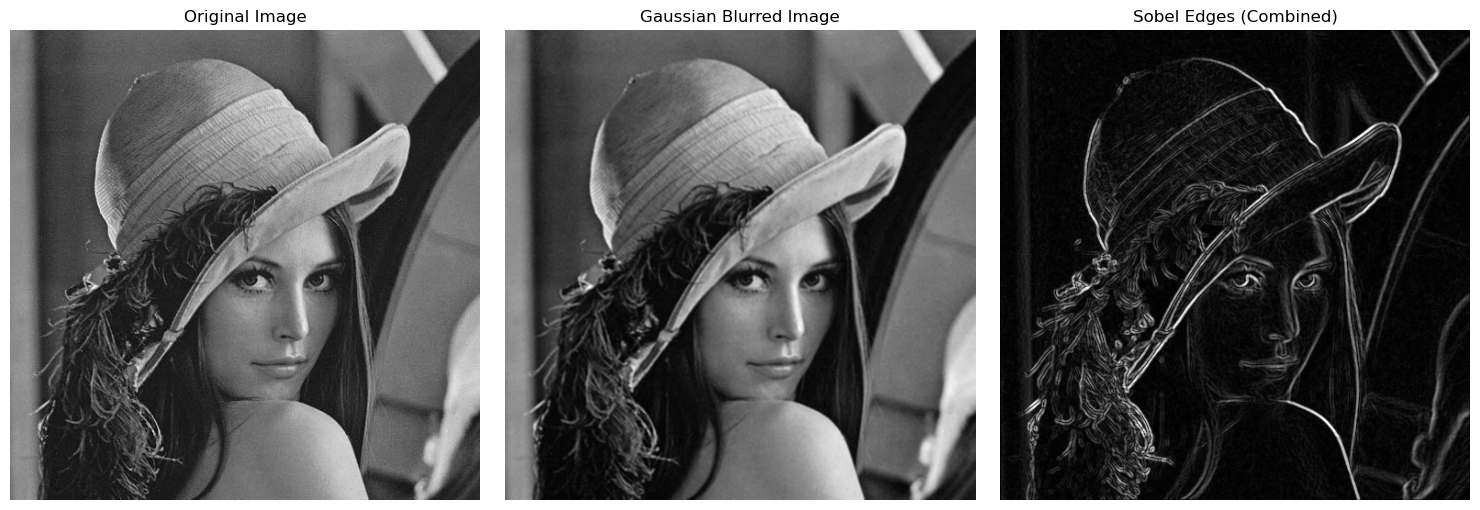

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the image
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (3, 3), sigmaX=1)

    # Apply Sobel operator in x and y directions
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Convert to absolute values and combine Sobel x and y images
    sobel_x_abs = cv2.convertScaleAbs(sobel_x)
    sobel_y_abs = cv2.convertScaleAbs(sobel_y)
    sobel_edges = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

    # Plot the images in a single row
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title("Sobel Edges (Combined)")
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()
